## Box Office Revenue Prediction - Report

### Igor Drozdov 317336451
### Shir Lissak 203507207

In [1]:
#import libraries 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import *
from Experiments import *

sns.set(style="darkgrid")

##  EDA & feature engineering

In [2]:
raw_data = pd.read_csv('data/train.tsv', sep="\t")

first we would like to take a look on the raw data:

In [3]:
raw_data.dtypes

backdrop_path             object
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count                 int64
Keywords                  object
cast                      object
crew                      object
dtype: object

In [4]:
raw_data.head()

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
3,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
4,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': ""National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."


In [5]:
raw_data.shape

(5215, 27)

In [6]:
raw_data.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [7]:
raw_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


The full preprocess code is attached in the Utils.py . In order to have comprehensive and summarized report, we will only present the handling of one of each of the following raw data feature categories:

1. link - (i.e., [homepage, backdrop_path]) 
2.  numeric - (ie, [budget, popularity, revenue, runtime, vote_average, vote_count]) nulls were imputed by median
3. json - (i.e., [belongs_to_collection, genres, production_companie, production_countries, crew, cast]) nulls were imputed by creating a new category (for example, for genres we added the category 'Other')
4. categorical - (i.e., [original_language])
5. date - (i.e., [release_date])
6. free text - columns that contain free text (i.e., [original_title, overview, tagline, Keywords])
7. id - were used only for data enrichment and integration. (i.e., [id, imdb_id]) 

After initial exploring of the data, we decided to drop the following since they had no variance/not informative/similar to other features:
[spoken_languages, status, title]


### Link Example - homepage

almost all the data in this column is unique, but some are nulls. we will check whether the relevance of this data may be implied by the missing values.
If so, we will use the "missingness" as a feature.

In [8]:
raw_data['homepage'].describe()

count                                 1766
unique                                1754
top       http://www.jackreachermovie.com/
freq                                     2
Name: homepage, dtype: object

In [9]:
raw_data['homepage'].head()

0    https://www.sonypictures.com/movies/spiderman3
1                                               NaN
2                      https://www.scottymovie.com/
3                                               NaN
4                                               NaN
Name: homepage, dtype: object

we will replace nulls for 0 and check the distribution:

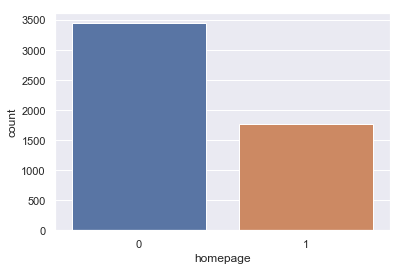

In [10]:
raw_data['homepage'] = np.where(raw_data['homepage'].isna(), 0, 1)

fig = plt.figure()
sns.countplot(x="homepage",data=raw_data)
plt.show()

<Figure size 432x288 with 0 Axes>

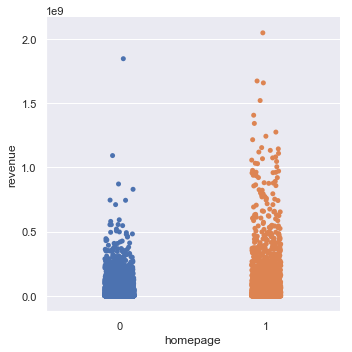

In [11]:
fig = plt.figure()
sns.catplot(x="homepage",y="revenue",data=raw_data)
plt.show()

from this graph we may learn that records with no homepage tend to have less revenue, thus it is definitely a feature we would like to use , same analysis was applied on the other 'link' features

In this section we produced the following features:
homepage and backdrop_path - both transformed into booleans (0 for null and 1 otherwise)

### Numeric Example - budget

In [12]:
raw_data['budget'].head()

0    258000000
1       250000
2            0
3      1000000
4     15000000
Name: budget, dtype: int64

In [13]:
raw_data['budget'].describe()

count    5.215000e+03
mean     2.147967e+07
std      3.631509e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.500000e+06
75%      2.600000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [14]:
def numerical_analysis(df,main_title,col,log1,log2,xlabel):
    fig, axs = plt.subplots(ncols=2)
    fig.suptitle(main_title+' analysis')
    fig.set_figheight(5)
    sns.boxplot(x=df[col],ax=axs[0])
    if log1:
        axs[0].set_xscale('log')
    axs[0].set_xlabel(xlabel)
    if log2:
        sns.distplot(df[col].apply(lambda x: np.log(x+1)) , axlabel=xlabel+' (log10)' , ax=axs[1])
    else:
        sns.distplot(df[col] , axlabel=xlabel , ax=axs[1])

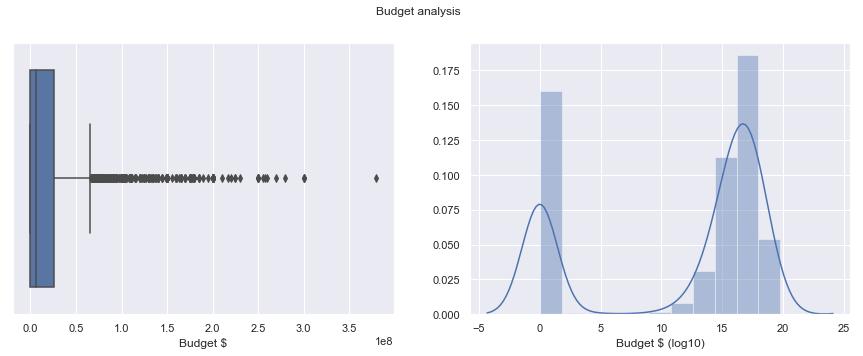

In [15]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
numerical_analysis(raw_data,'Budget','budget',False,True,'Budget $')

It seems that the log transformation makes the budget distribution seems much nicer, so we decided to use it as a feature as well

In [16]:
raw_data['log_budget'] = np.log10(raw_data['budget']+1)

### Json Example - geners

In [17]:
raw_data['genres'].head()

0    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
1    [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...
2                  [{'id': 99, 'name': 'Documentary'}]
3                       [{'id': 27, 'name': 'Horror'}]
4    [{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...
Name: genres, dtype: object

First we need to parse the json file and impute missing genres with the 'Other' category

In [18]:
list_of_genres = list(raw_data['genres'].apply(lambda x: [i['name'] for i in parser(x)] if x != {} else ['Other']).values)
set_of_genres = set([m for m in Counter([i for j in list_of_genres for i in j])])
raw_data['genres'] = raw_data['genres'].apply(lambda x: [i['name'] for i in parser(x)] if x != {} else ['Other']).values
raw_data['num_of_geners'] = raw_data['genres'].apply(lambda x: len(x))
for g in set_of_genres:
    raw_data['genre_' + g] = raw_data['genres'].apply(lambda x: 1 if g in x else 0)

In [19]:
raw_data['num_of_geners'].describe()

count    5215.000000
mean        2.468648
std         1.093151
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: num_of_geners, dtype: float64

Each movie got few genres, let's see the distribution of the number of genres per movie:

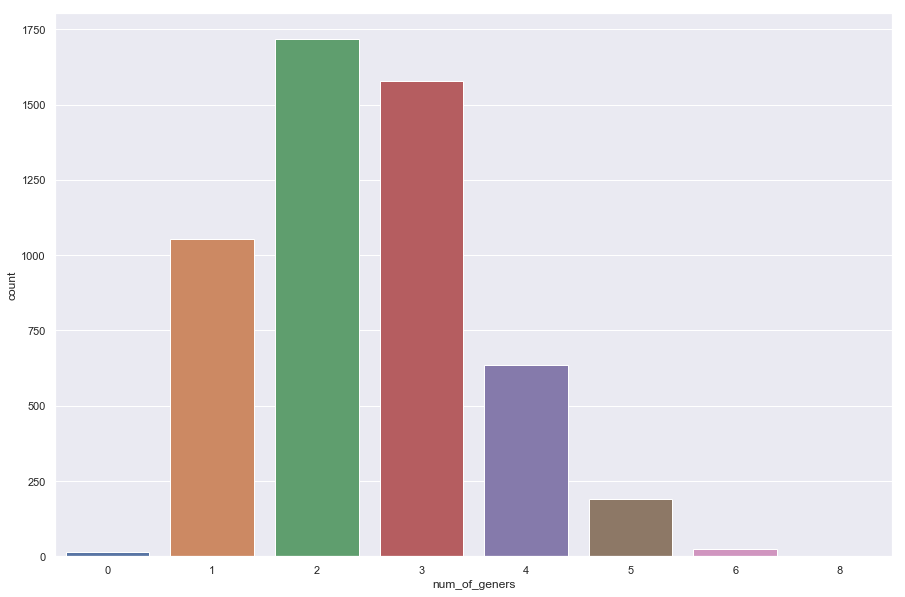

In [20]:
fig = plt.figure()
sns.countplot(x="num_of_geners",data=raw_data)
plt.show()

Single genre distribution across all the movies:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

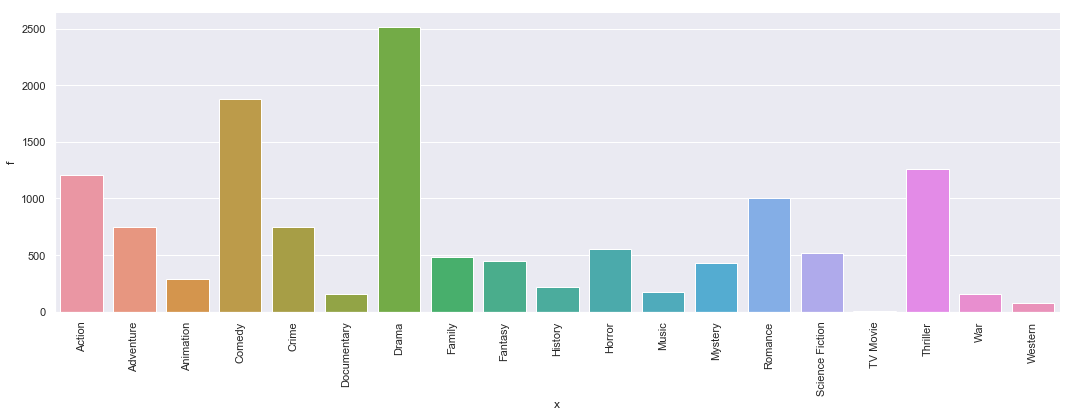

In [23]:
a = pd.Series([item for sublist in raw_data.genres for item in sublist])
df = a.value_counts().sort_index().rename_axis('x').reset_index(name='f')

sns.catplot(x="x",y="f",data=df,kind="bar", height=5, aspect=3)
plt.xticks(rotation=90)

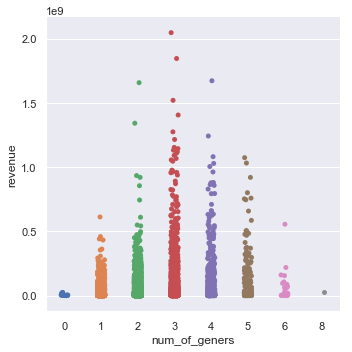

In [24]:
sns.catplot(x="num_of_geners",y="revenue",data=raw_data)

from these graphs we may learn that records with different number of geners tend to have different revenue. 
Moreover, different genres tend to have different revenue as seen in the following graph:

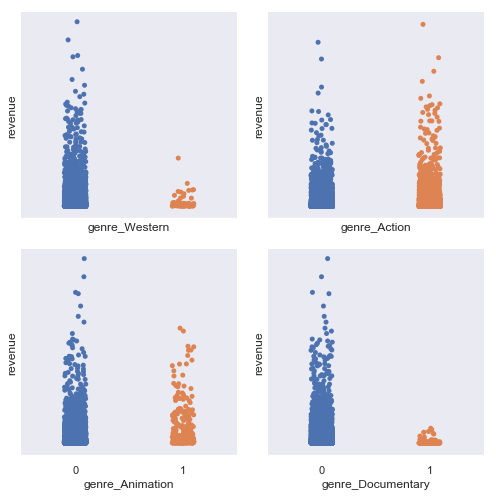

In [25]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

sns.stripplot(x="genre_Western",y="revenue",data=raw_data,ax=axes[0, 0])
sns.stripplot(x="genre_Action",y="revenue",data=raw_data,ax=axes[0, 1])
sns.stripplot(x="genre_Animation",y="revenue",data=raw_data,ax=axes[1, 0])
sns.stripplot(x="genre_Documentary",y="revenue",data=raw_data,ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()


In this section we produced the following features:
numer of genres, one-hot encoding for the genres,
has_collection(1 if belongs to a collection, 0 otherwise) , collection_id (categorical),
numer of production companies, one-hot encoding for the top 30 production companies,
number of production countries, one-hot encoding for the top 15 production countries,
number of people which were casted, one-hot encoding for the top 10 actors,
number of people in the crew , one-hot encoding for the top 10 jobs and crew departments,



### Categorical Example - original_language

In [26]:
raw_data['original_language'].describe()

count     5215
unique      43
top         en
freq      4385
Name: original_language, dtype: object

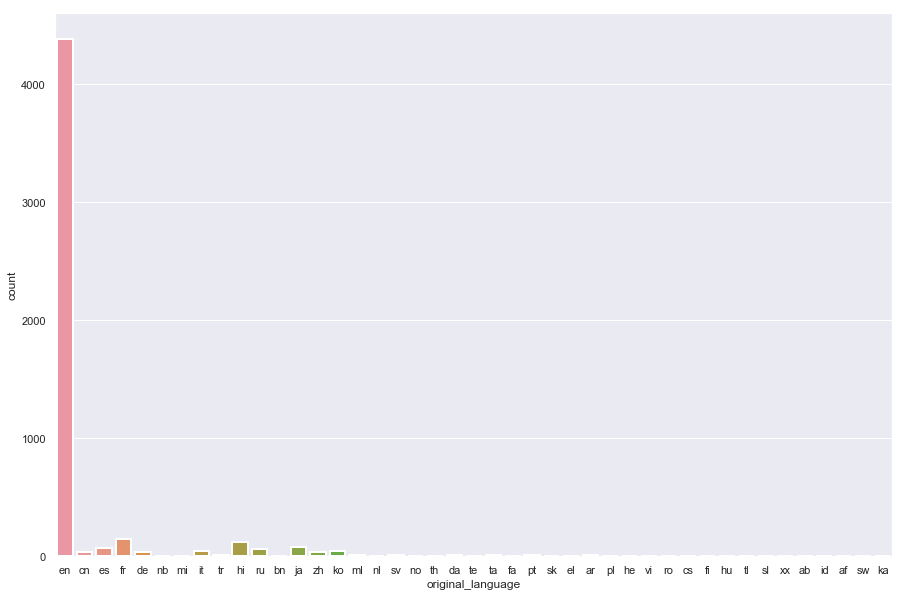

In [27]:
sns.countplot(x="original_language",data=raw_data,  linewidth=2)

### Date Example - release_date

In [28]:
raw_data['release_date'].head()

0    2007-05-01
1    1987-04-10
2    2018-07-27
3    1987-09-11
4    1983-07-28
Name: release_date, dtype: object

In [29]:
raw_data['release_date'].describe()

count           5215
unique          3782
top       2014-12-25
freq               7
Name: release_date, dtype: object

We created the following new features:

1.the year in which the movie was released


2.how many years passed since the movie was released


3.the season in which the movie was released

In [32]:
raw_data['release_date'] = pd.to_datetime(raw_data['release_date'])
raw_data['release_year'] = raw_data['release_date'].dt.year
raw_data['release_month'] = raw_data['release_date'].dt.month
raw_data['passed_years'] = date.today().year - raw_data['release_year']
raw_data['release_season'] = pd.cut(raw_data['release_month'], bins=[0, 3, 6, 9, 12],
                                    labels=["Winter", "Spring", "Summer", "Autumn"]).astype('category')

We can learn that most of the movies are from recent years:

(1920, 2020)

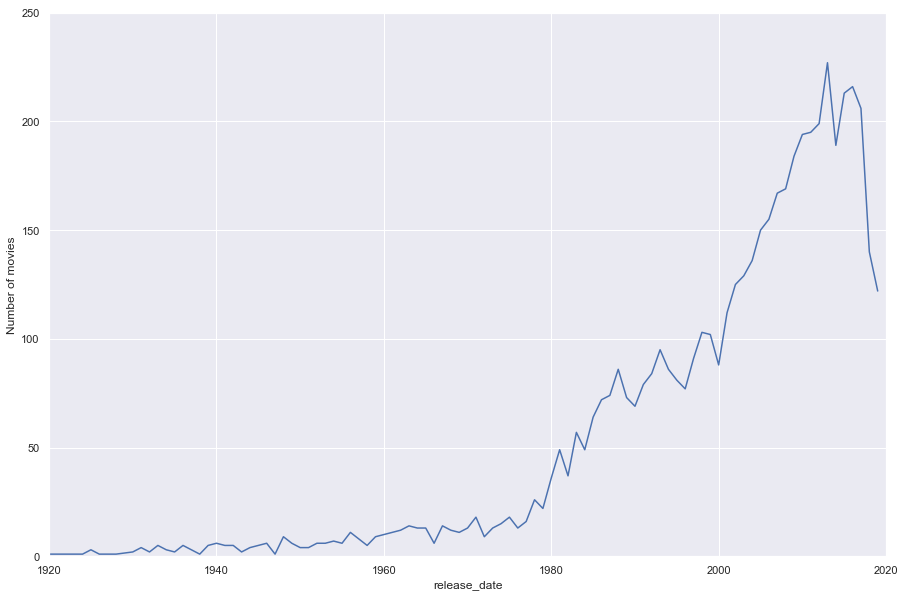

In [33]:
raw_data['id'].groupby(raw_data['release_date'].dt.year).count().plot()
plt.ylabel('Number of movies')
plt.ylim(0,250)
plt.xlim(1920,2020)

Let's check how revenue differ per seasons:

<Figure size 1080x720 with 0 Axes>

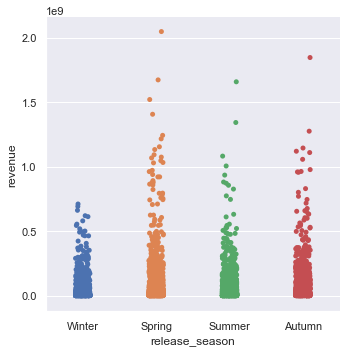

In [34]:
fig = plt.figure()
sns.catplot(x="release_season",y="revenue",data=raw_data)

We can also notice that in each year the movie industry makes more revenue

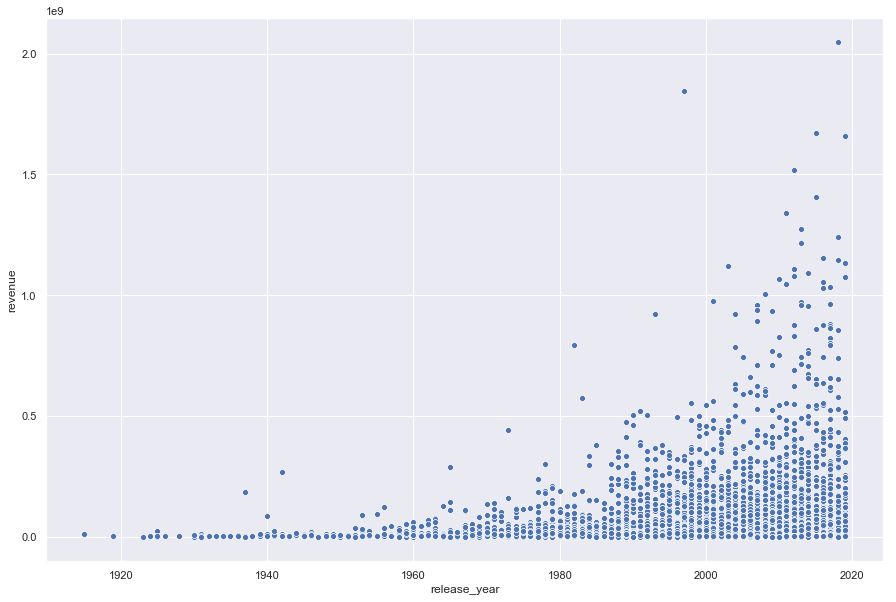

In [35]:
fig = plt.figure()
sns.scatterplot(x="release_year",y="revenue",data=raw_data)

### Free Text Example - overview

In [36]:
raw_data["overview"].head()

0    The seemingly invincible Spider-Man goes up ag...
1    After being traumatized by his brother Billy's...
2    A deliciously scandalous portrait of unsung Ho...
3    An unfaithful wife encounters the zombie of he...
4    Clark Griswold is on a quest to take his famil...
Name: overview, dtype: object

In [37]:
raw_data["overview"].describe()

count                   5209
unique                  5206
top       No overview found.
freq                       2
Name: overview, dtype: object

In [38]:
raw_data['len_' + "overview"] = raw_data["overview"].fillna('').apply(lambda x: len(str(x)))
raw_data['words_' + "overview"] = raw_data["overview"].fillna('').apply(lambda x: len(str(x.split(' '))))


Let's check the connection between the length of the overview and the revenue

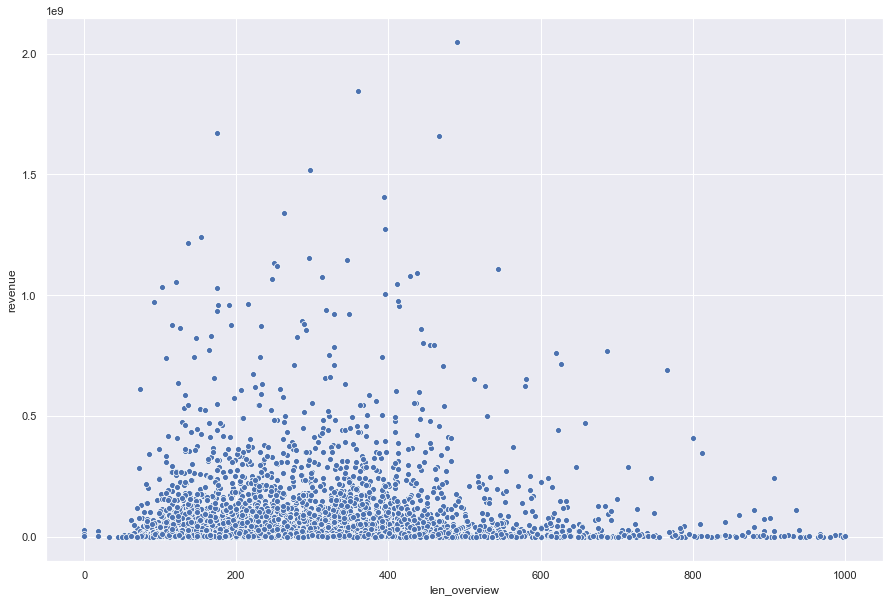

In [39]:
fig = plt.figure()
sns.scatterplot(x="len_overview",y="revenue",data=raw_data)

We thought about whether the content can imply us about the expected revenue of the movie, so we extracted a feature out of the free text by training a tf-idf combined with ridge regression model on free text columns and tried to predict with it the revenue , as we can see , it does quite good on the data it was trained on - thus we are going to use it.

In [40]:
vectorizer = TfidfVectorizer(sublinear_tf=True,analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2),min_df=10)
oof_text = vectorizer.fit(list(raw_data["overview"].fillna('')) + list(raw_data["overview"].fillna('')))
train_overview_text = vectorizer.transform(raw_data["overview"].fillna(''))
model = linear_model.Ridge(0.1)
ridge_model = model.fit(train_overview_text, raw_data["revenue"])
raw_data["overview" + '_oof'] = model.predict(train_overview_text)

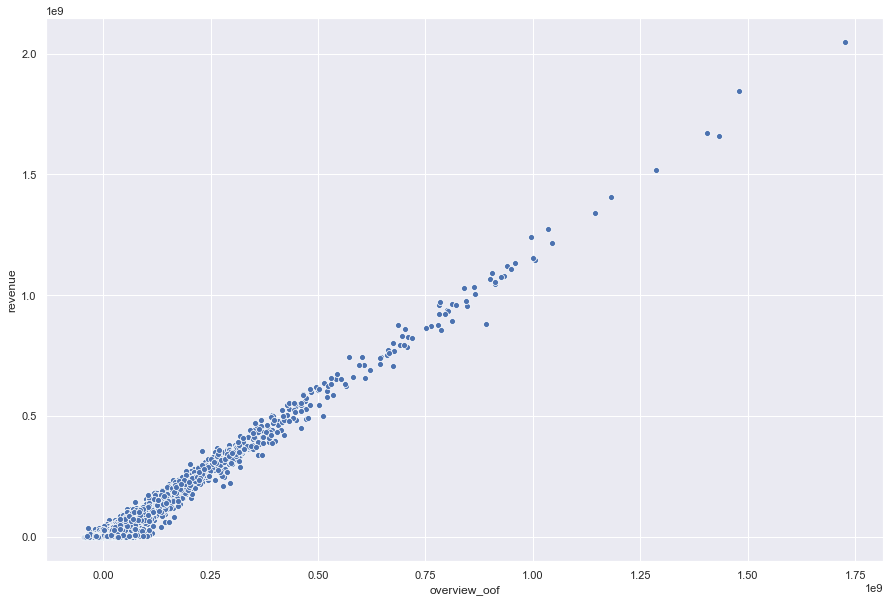

In [41]:
fig = plt.figure()
sns.scatterplot(x="overview_oof",y="revenue",data=raw_data)

## Correlations

In this section we will check correlations in order to try a see which variables are correlated with the target and which variable are correlated with each other, this information can be used in order to prevent overfitting or just to drop similar columns

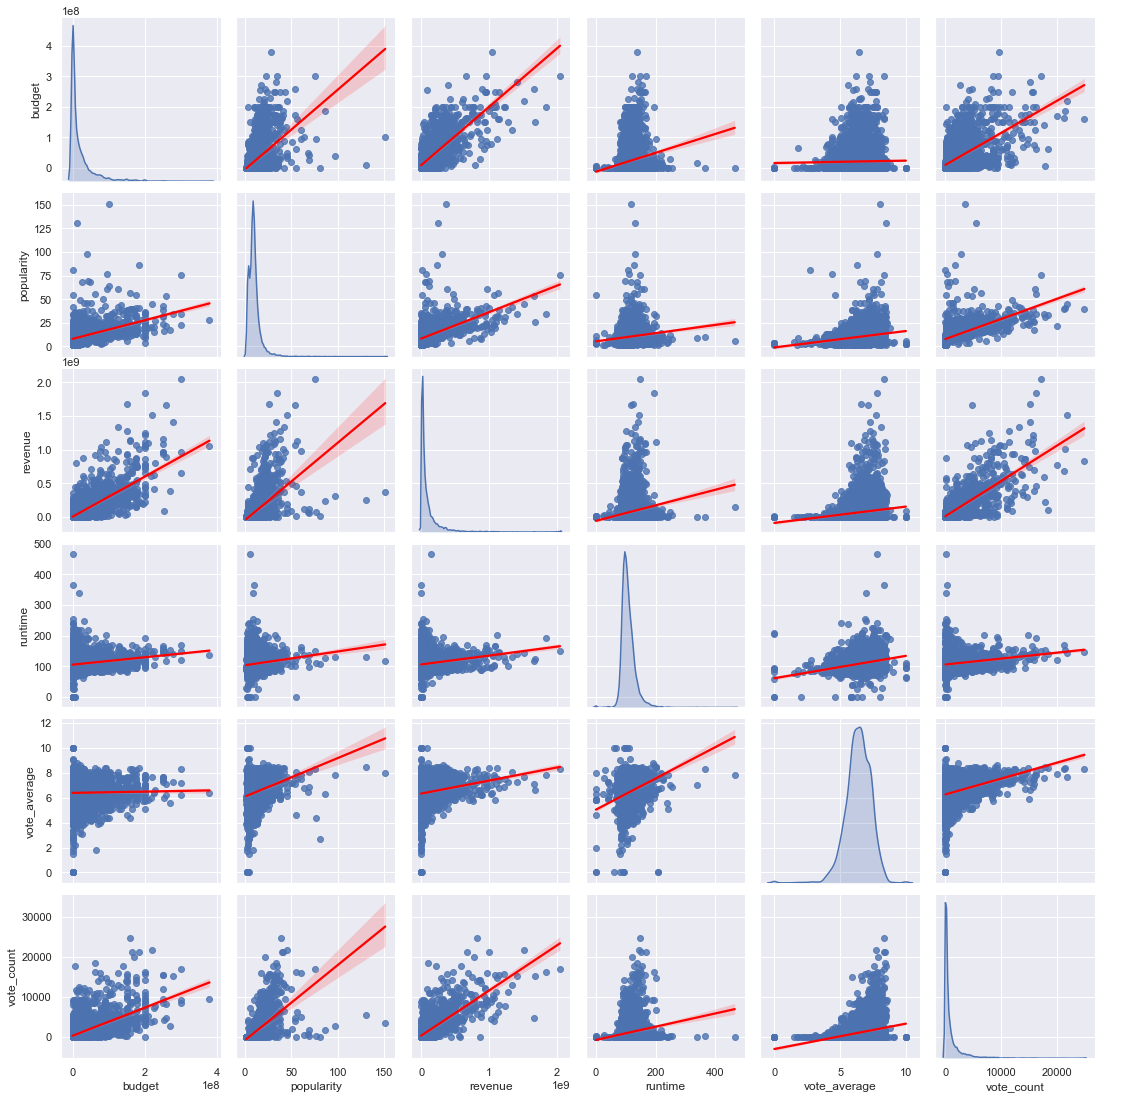

In [42]:
numerical_vals = ['budget','popularity','revenue','runtime','vote_average','vote_count']
cat_vals = ['homepage', 'original_language','release_season']
sns.pairplot(raw_data[numerical_vals], diag_kind="kde",kind='reg',plot_kws={'line_kws':{'color':'red'}})

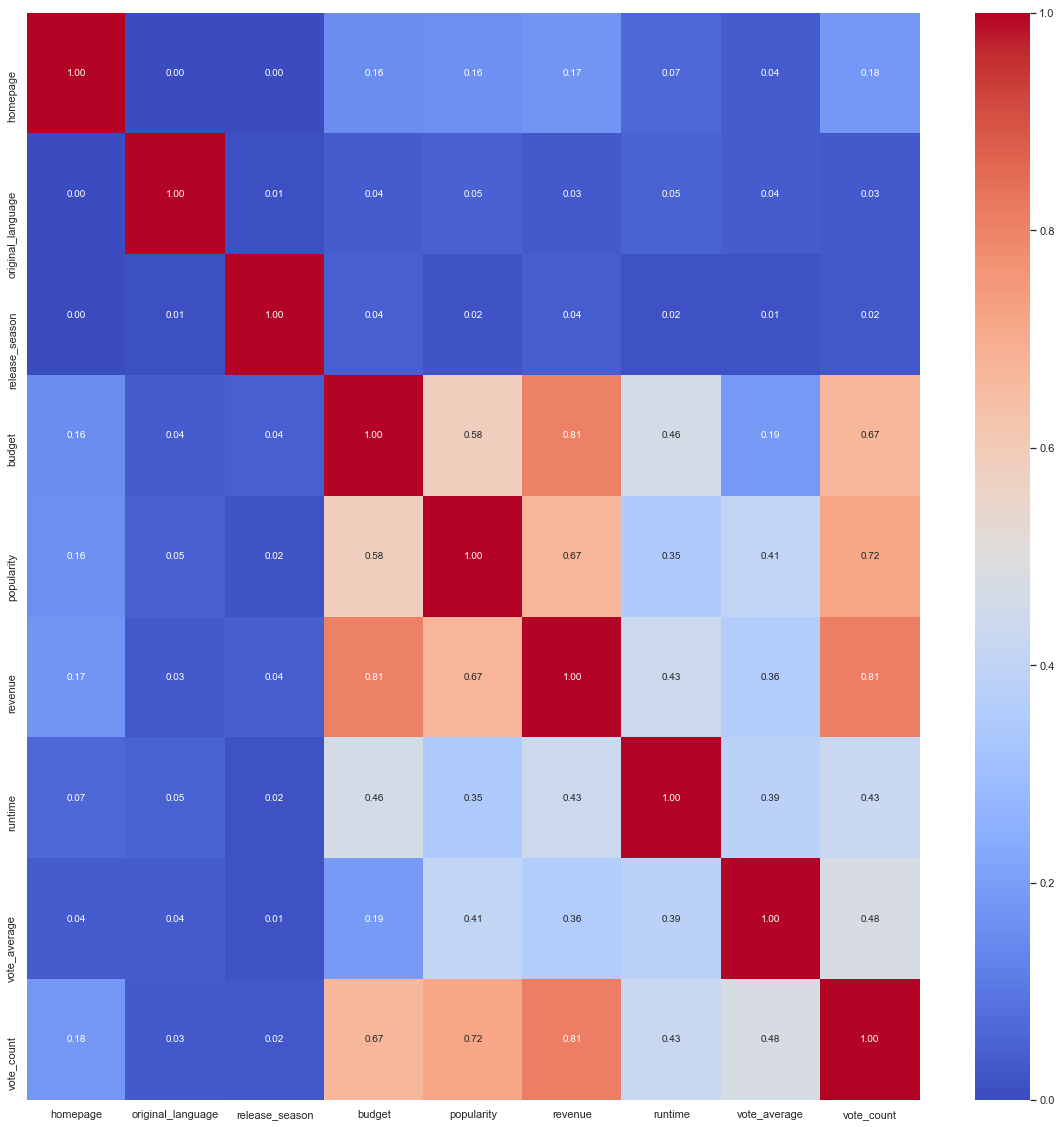

,homepage,original_language,release_season,budget,popularity,revenue,runtime,vote_average,vote_count
homepage,1.000000,0.000000,0.000000,0.155587,0.159330,0.172149,0.065383,0.035364,0.182528
original_language,0.000000,1.000000,0.010230,0.038399,0.048914,0.031335,0.052239,0.035470,0.034401
release_season,0.000000,0.010230,1.000000,0.044101,0.019416,0.042493,0.015552,0.014060,0.023488
budget,0.155587,0.038399,0.044101,1.000000,0.584769,0.806326,0.461694,0.189096,0.671639
popularity,0.159330,0.048914,0.019416,0.584769,1.000000,0.672903,0.348408,0.407797,0.715394
revenue,0.172149,0.031335,0.042493,0.806326,0.672903,1.000000,0.433617,0.358175,0.812211
runtime,0.065383,0.052239,0.015552,0.461694,0.348408,0.433617,1.000000,0.385030,0.426852
vote_average,0.035364,0.035470,0.014060,0.189096,0.407797,0.358175,0.385030,1.000000,0.479365
vote_count,0.182528,0.034401,0.023488,0.671639,0.715394,0.812211,0.426852,0.479365,1.000000


In [43]:
associations(raw_data.dropna().reset_index()[cat_vals+numerical_vals],nominal_columns=cat_vals,return_results=True)

## Data Enrichment

in addition to the columns displayed above, we looked for:
1. interaction between features that may produce a new informative feature
2. extra sources for movie data 

### Interaction Between Features

we tried to think of possible feature which hold relevant interaction and those are the one we found relevant:

In [44]:
raw_data = pd.read_csv('data/clean_data.csv')

In [45]:
raw_data['vote_count_avg'] = raw_data['vote_count']/(np.log2(raw_data['passed_years']+1)+1)
raw_data['avg_salary']=raw_data['budget']/(raw_data['num_crew']+raw_data['num_cast'])
raw_data['budget_to_popularity'] = raw_data['budget'] / raw_data['popularity']
raw_data['budget_to_runtime'] = raw_data['budget'] / raw_data['runtime']
raw_data['runtime_to_mean_year'] = raw_data['runtime'] / raw_data.groupby("release_year")["runtime"].transform('mean')
raw_data['popularity_to_mean_year'] = raw_data['popularity'] / raw_data.groupby("release_year")["popularity"].transform('mean')
raw_data['budget_to_mean_year'] = raw_data['budget'] / raw_data.groupby("release_year")["budget"].transform('mean')

an example the revenue as a function of one of this new features

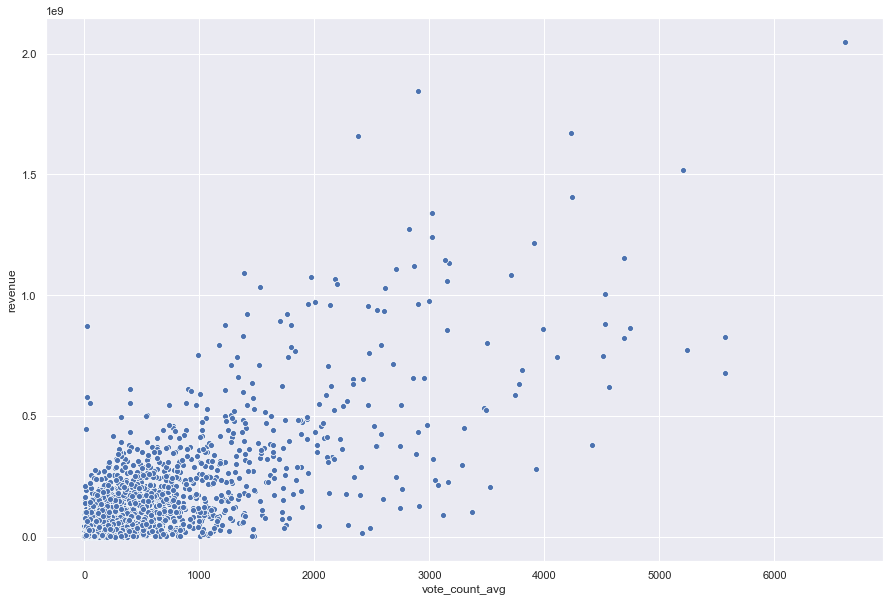

In [46]:
fig = plt.figure()
sns.scatterplot(x="vote_count_avg",y="revenue",data=raw_data)

### Integration of External Data 

we looked for external data that may help to predict the revenue.

we used some front-end tricks to download it ;)

first, we calculated the budget in respect to the inflation rate of the relevant year.
we chose to do so only on the budget, since the revenue in not related only to one year.

In [47]:
secret_weapon = pd.read_csv('./data/inflation_data.csv')
secret_weapon = secret_weapon.set_index('year')
secret_weapon['amount'] = secret_weapon['amount'].max()/secret_weapon['amount']
for idx in raw_data.index:
    raw_data['budget'].loc[idx] = raw_data['budget'].loc[idx]* secret_weapon.loc[raw_data['release_year'].loc[idx], 'amount']

C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


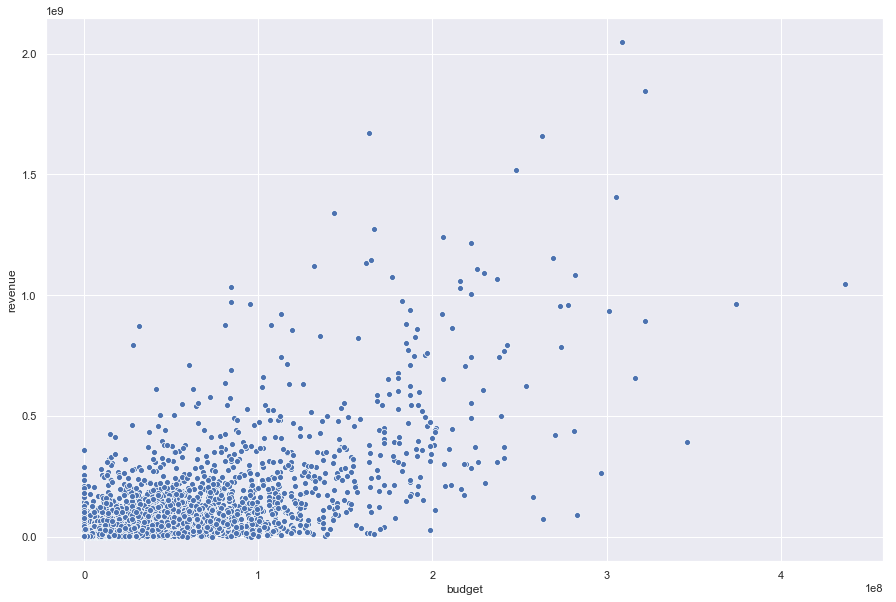

In [48]:
fig = plt.figure()
sns.scatterplot(x="budget",y="revenue",data=raw_data)

also, we used data about the movie industry - productions companies information, collections info, years info, rating by imdb_id.

an example of one such integration:

In [49]:
collectiond_df = pd.read_csv("./data/collections.csv",encoding="ISO-8859-1")
collectiond_df['revnue'] = collectiond_df.revnue.str.replace(r'\D','').astype(np.int64)
collectiond_df['avg_revenue_for_movie'] = collectiond_df.apply(lambda x: x.revnue / x.number_of_movies, axis=1)
collectiond_df['collection'] = collectiond_df['collection'].str.lower()

raw_data['collection_name'] = raw_data['collection_name'].str.lower()
raw_data['collection_name'] = raw_data['collection_name'].str.replace(r' collection', '')

raw_data['collection_number_of_movies'] = 0
raw_data['collection_avg_rev_for_movie'] = 0
raw_data['collection_total_rev'] = 0

for index, row in raw_data.iterrows():
    collection = row['collection_name']
    rows_collection = collectiond_df.loc[collectiond_df['collection'] == collection]
    if not rows_collection.empty:
        raw_data['collection_number_of_movies'][index] = list(rows_collection['number_of_movies'])[0]
        raw_data['collection_avg_rev_for_movie'][index] = list(rows_collection['avg_revenue_for_movie'])[0]
        raw_data['collection_total_rev'][index] = list(rows_collection['revnue'])[0]

C:\Users\Igor\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Igor\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Igor\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 1080x720 with 0 Axes>

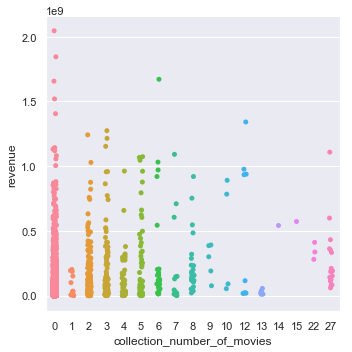

In [50]:
fig = plt.figure()
sns.catplot(x="collection_number_of_movies",y="revenue",data=raw_data)
plt.show()

## few more features for dessert:

Lastly , We decided to create another bunch of statistical features - we calculated the mean,max,min and number of appearances of each numerical column with respect to the features 'release_season','collection_id','original_language','jobs_Executive Producer','jobs_Art Direction' independently (i.e. 'mean_release_season_budget' - the mean budget grouped by season). This little addition brought us from 150~ features to nearly 800.

Another thing we did is to find highly(above 0.8) correlated columns with the 'revenue' column and dropped them as they may result overfit. 

## Model Selection

Inspired by the recent competitions of Kaggle we realized that the models that will yield us the best results are tree-based , in particular - boosting trees.

So we narrowed our choices to XGBoost(2014), LightGBM(2017) and CatBoost(2018).

Eventually, we decided to drop XGBoost since we have a few categorical features which XGBoost doesn't handle (while CatBoost was created mainly to handle them in a clever way and LightGBM also knows to handle those but in a more primitive way) - only if we make additional preprocess and encoding and the training time is much higher than the other 2 models.  

## Hyperparameter tunning, regulization, training and validation 

Since both model got a LOT of hyper parameters we had to come up with some automatic way of checking which model is the best. For that purpose we used RandomizedSearchCV which is implemented in sklearn library. It basicaly perform lots of expirements with different parameters while using cross-validation (regular k-folds) in order to determinate which set of parameters is the best. It looks like that in our code (example for LightGBM):

In [ ]:
fit_params = {"early_stopping_rounds": 200,
              "eval_metric": 'rmse',
              "eval_set": [(X_test, y_test)],
              'eval_names': ['valid'],
              'categorical_feature': 'auto'}

param_test = {'num_leaves': sp_randint(6, 50),
              'min_child_samples': sp_randint(0, 500),
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8),
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20]}

clf = lgb.LGBMRegressor(max_depth=-1, random_state=314, silent=True,objective='regression', n_jobs=4, n_estimators=5000)
grid = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test,
    scoring='neg_root_mean_squared_error',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

grid.fit(X_train,y_train,**fit_params)

## Final Results

After finding the optimal parameters, we ran a final training and a precieved the following results:

LGBM:

In [52]:
df = pd.read_csv('./data/clean_data.csv')
results = train(df,'revenue','LGBM')
pickle.dump(results,open('./models.pkl','wb'))
results = pickle.load(open('./models.pkl','rb'))
test_df = pd.read_csv('data/test.tsv', sep="\t")
ground_truth = test_df['revenue'].values.flatten()
predictions = predict(test_df,'revenue',results)
print('Test set RMSLE: {}'.format(rmsle(ground_truth,predictions)))

--- starting training ----


C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[group_var] = group_ids


(5215, 721)
Number of columns that are removed:  454
(5215, 266)
--- done training ----
--- starting predicting ----


C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_number_of_movies'][index] = max(number_of_movies)
C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_avg_rev_for_movie'][index] = max(avg_rev_for_movie)
C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

--- done predicting ----
Test set RMSLE: 0.3321205261778695


CatBoost:

In [53]:
results = train(df,'revenue','CATBOOST')
pickle.dump(results,open('./models.pkl','wb'))
results = pickle.load(open('./models.pkl','rb'))
test_df = pd.read_csv('data/test.tsv', sep="\t")
ground_truth = test_df['revenue'].values.flatten()
predictions = predict(test_df,'revenue',results)
print('Test set RMSLE: {}'.format(rmsle(ground_truth,predictions)))

--- starting training ----


C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[group_var] = group_ids


(5215, 721)
Number of columns that are removed:  454
(5215, 266)


You should provide test set for use best model. use_best_model parameter has been switched to false value.


--- done training ----
--- starting predicting ----


C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_number_of_movies'][index] = max(number_of_movies)
C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_avg_rev_for_movie'][index] = max(avg_rev_for_movie)
C:\Users\Igor\PycharmProjects\Box-Office-Revenue-Prediction\Utils.py:572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

--- done predicting ----
Test set RMSLE: 0.32545393150050744
